<a href="https://colab.research.google.com/github/Kim-Yeon-Jun/Transformer/blob/main/Tfch_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/rickiepark/nlp-with-transformers.git
%cd nlp-with-transformers
from install import *
install_requirements(chapter=2)

Cloning into 'nlp-with-transformers'...
remote: Enumerating objects: 600, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 600 (delta 12), reused 2 (delta 1), pack-reused 569
Receiving objects: 100% (600/600), 57.83 MiB | 16.43 MiB/s, done.
Resolving deltas: 100% (300/300), done.
/content/nlp-with-transformers
⏳ Installing base requirements ...
✅ Base requirements installed!
Using transformers v4.33.3
Using datasets v2.14.5
Using accelerate v0.23.0
Using sentencepiece v0.1.99
Using umap v0.5.4
No GPU was detected! This notebook can be *very* slow without a GPU 🐢
Go to Runtime > Change runtime type and select a GPU hardware accelerator.


In [2]:
!pip install transformers
from transformers import pipeline
import pandas as pd
!pip install sentencepiece
import sentencepiece
!pip install datasets

In [3]:
from datasets import list_datasets

all_datasets = list_datasets()
print(f"현재 허브에는 {len(all_datasets)}개의 데이터셋이 있습니다.")
print(f"처음 10개 데이터셋 : {all_datasets[:10]}")

<ipython-input-3-5c1a87cea912>:3: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()


현재 허브에는 65541개의 데이터셋이 있습니다.
처음 10개 데이터셋 : ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa',
'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue',
'ajgt_twitter_ar', 'allegro_reviews']


In [4]:
from datasets import load_dataset

emotions = load_dataset("emotion")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [5]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [6]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [7]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [8]:
train_ds.column_names

['text', 'label']

In [9]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness',
'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [10]:
print(train_ds[:5])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so
damned hopeful just from being around someone who cares and is awake', 'im
grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic
about the fireplace i will know that it is still on the property', 'i am feeling
grouchy'], 'label': [0, 0, 3, 2, 3]}


In [11]:
emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [12]:
def label_int2str(row):
  return emotions["train"].features["label"].int2str(row)
df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [13]:
!pip install matplotlib

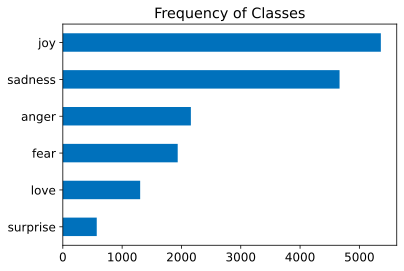

In [14]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

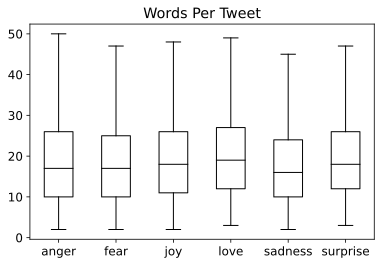

In [15]:
#트윗 길이 확인
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by = "label_name", grid=False,
           showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [16]:
#문자 토큰화
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ',
'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o',
'f', ' ', 'N', 'L', 'P', '.']


In [17]:
#어휘사전에 있는 각 문자를 고유한 정수로 바꾸는 매핑 딕셔너리 생성
#token2idx를 사용해 토큰화된텍스트를 정수 리스트로 변환
token2idx = {ch:idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9,
'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18,
'z': 19}


In [18]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7,
14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [19]:
#각 이름을 고유의 아이디로 매핑
categorical_df = pd.DataFrame(
    {"Name": ["Bumblebee", "Optimus Prime", "Megatron"], "Label ID":[0,1,2]})
categorical_df

,Name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


In [20]:
#원-핫 벡터
pd.get_dummies(categorical_df["Name"])

,Bumblebee,Megatron,Optimus Prime
0,1,0,0
1,0,0,1
2,0,1,0


In [21]:
import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

In [22]:
print(f"토큰 : {tokenized_text[0]}")
print(f"텐서 인덱스 : {input_ids[0]}")
print(f"원-핫 인코딩 : {one_hot_encodings[0]}")

토큰 : T
텐서 인덱스 : 5
원-핫 인코딩 : tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [23]:
#단어 토큰화(주로 사용)
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


In [24]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [25]:
from transformers import DistilBertTokenizer
distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [26]:
#단어를 input_ids필드에 있는 고유한 정수에 매핑
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953,
2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [27]:
# CLS, SEP : 시퀀스의 처음과 끝을 알려줌
# 토큰이 모두 소문자화(체크포인트의 특징)
# '#'은 공백이 아님을 의미하는 문자
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl',
'##p', '.', '[SEP]']


In [28]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [29]:
tokenizer.vocab_size

30522

In [30]:
tokenizer.model_max_length #모델의 최대 문맥 크기

512

In [31]:
tokenizer.model_input_names #모델이 정방향 패스에서 기대하는 필드 이름

['input_ids', 'attention_mask']

In [32]:
#전체 데이터셋 토큰화

#샘플을 토큰화할 처리 함수 선언

def tokenize(batch):
  return tokenizer(batch["text"], padding=True, truncation=True)

In [33]:
emotions = load_dataset("emotion")
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000,
2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300,
102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1]]}


In [34]:
tokens2ids = list(zip(tokenizer.all_special_tokens, tokenizer.all_special_ids))
data = sorted(tokens2ids, key=lambda x : x[-1])
df = pd.DataFrame(data, columns=["Special Token", "Special Token ID"])
df.T

,0,1,2,3,4
Special Token,[PAD],[UNK],[CLS],[SEP],[MASK]
Special Token ID,0,100,101,102,103


In [35]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)
print(emotions_encoded["train"].column_names)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

['text', 'label', 'input_ids', 'attention_mask']


##텍스트 분류 모델 훈련


In [36]:
# 트랜스포머를 특성 추출기로 사용하기
#사전 훈련된 모델 사용
from transformers import AutoModel
model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [37]:
#마지막 은닉 상태 추출(인코딩->토큰을 파이토치 텐서로 변환)
text = 'this is  a test'
inputs = tokenizer(text, return_tensors="pt")
print(f"입력 텐서 크기 : {inputs['input_ids'].size()}")
#결과로 출력되는 텐서의 크기 : [batch_size, n_tokens]

입력 텐서 크기 : torch.Size([1, 6])


In [38]:
#입력 전달
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
  outputs=model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ...,
-0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]]),
hidden_states=None, attentions=None)


In [39]:
outputs.last_hidden_state.size()
#[batch_size, n_tokens, hidden_dim]
#n_tokens개의 입력 토큰마다 hidden_dim개 차원의 벡터가 반환되었음을 의미

torch.Size([1, 6, 768])

In [40]:
outputs.last_hidden_state[:,0].size()
torch.Size([1,768])

torch.Size([1, 768])

In [41]:
# 위의 작업을 함수로 구성
def extract_hidden_states(batch):
  #모델의 입력을 GPU로 옮김
  inputs = {k:v.to(device) for k,v in batch.items()
            if k in tokenizer.model_input_names}
  #마지막 은닉 상태를 추출합니다.
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state
  #[CLS] 토큰에 대한 벡터 반환 / 분류 작업에서는 보통 CLS 토큰에 연관된 은닉 상태를 입력 특성으로 사용
  return {"hidden_state" : last_hidden_state[:,0].cpu().numpy()} # 마지막 은닉 상태를 CPU로 다시 가져와 넘파이 배열로 바꿈

In [42]:
#모델의 입력 요구(텐서)에 맞게 input_ids와 attention_mask 열을  torch 포맷으로 변경
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

In [43]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [44]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [45]:
#특성행렬 만들기
import numpy as np

X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [46]:
#훈련 세트 시각화
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

#특성 스케일을 [0,1] 범위로 조정
X_scaled = MinMaxScaler().fit_transform(X_train)
#UMAP 객체를 생성하고 훈련
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
#2D 임베딩의 데이터프레임을 만듦
df_emb = pd.DataFrame(mapper.embedding_, columns=["X","Y"])
df_emb["label"] = y_train
df_emb.head

<bound method NDFrame.head of               X         Y  label
0      4.067286  6.384014      0
1     -3.383334  5.451953      0
2      4.888896  3.141893      3
3     -2.577121  3.173195      2
4     -3.530936  3.503817      3
...         ...       ...    ...
15995 -0.739541  6.519917      0
15996 -2.297054  5.235008      0
15997 -2.629399  2.979714      1
15998  4.788328  3.418096      3
15999 -2.102141  5.059774      0

[16000 rows x 3 columns]>

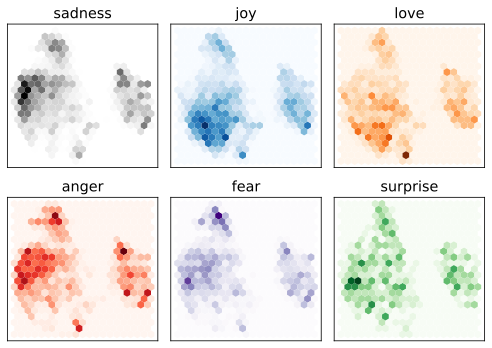

In [47]:
# 훈련세트 시각화
fig, axes = plt.subplots(2,3,figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys","Blues","Oranges","Reds","Purples","Greens"]
labels = emotions["train"].features["label"].names

for i,(label, cmap) in enumerate(zip(labels, cmaps)):
  df_emb_sub = df_emb.query(f"label == {i}")
  axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap, gridsize=20, linewidths=(0,))
  axes[i].set_title(label)
  axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

In [48]:
#간단한 분류 모델 훈련(사이킷런 로지스틱 회귀)
from sklearn.linear_model import LogisticRegression

#수렴을 보장하기 위해 max_iter 증가시킴
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.634

In [49]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

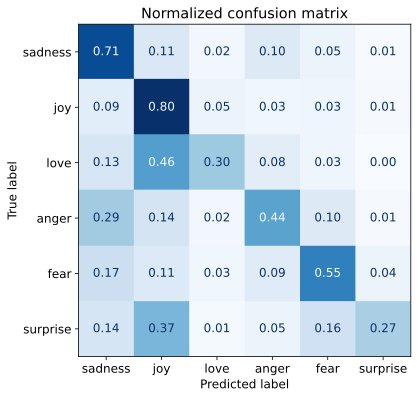

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(6,6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
  plt.title("Normalized confusion matrix")
  plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

## 트랜스포머 미세 튜닝

In [51]:
#사전 훈련된 모델 로드
from transformers import AutoModelForSequenceClassification

num_labels = 6
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device))

In [52]:
 # 성공 지표 정의
 from sklearn.metrics import accuracy_score, f1_score
 def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy":acc, "f1":f1}

##데이터셋과 측정지표 준비->Trainer 클래스 정의 전

허깅페이스 허브에 로그인 및 미세튜닝한 모델을 허브 계정에 저장하고 커뮤니티에 공유

훈련을 위한 모든 하이퍼파라미터 정의

In [59]:
# 모델 훈련
from huggingface_hub import notebook_login

notebook_login()

In [60]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded["train"])
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir = model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  save_strategy="epoch",
                                  load_best_model_at_end=True,
                                  log_level="error")

In [ ]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train()

Epoch,Training Loss,Validation Loss


In [ ]:
#predict() 메서드의 출력은 PredictionOutput 객체로 predictions, label_ids 배열과 함께 Trainer 클래스에 전달할 측정 지표의 값도 담고 있음.
#검증세트에 대한 지표 확인
preds_output = trainer.predict(emotions_encoded["validation"])

In [ ]:
y_preds = np.argmax(preds_output.predictions, axis=1)

In [ ]:
plot_confusion_matrix(y_preds, y_valid, labels)

In [ ]:
#오류분석(모델의 손실을 기준으로 검증 샘플을 정렬 - 정방향 패스의 결과와 레이블 사용)
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
  #모든 입력 텐서를 모델과 같은 장치로 이동
  inputs = {k:v.to(device) for k,v in batch.items()
    if k in tokenizer.model_input_names}
  with torch.no_grad():
    output = model(**inputs)
    pred_label = torch.argmax(output.logits, axis=1)
    loss = cross_entropy(output.logits, batch["label"].to(device),reduction="none")

  #다른 데이터셋 열과 호환되도록 출력을 CPU로 옮김
  return {"loss": loss.cpu().numpy(),
          "predicted_label":pred_label.cpu().numpy()}


In [ ]:
#map() 메서드를 통해 이 함수를 적용시켜 모든 샘플의 손실을 구함
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])
#손실값 계산
emotions_encoded["validation"] = emotions_encoded["validation"].map(forward_pass_with_label, batched=True, batch_size=16)

In [ ]:
#DataFrame 생성
emotions_encoded.set_format("pandas")
cols = ["text","label","predicted_label","loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"]=df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"].apply(label_int2str))

In [ ]:
#손실이 가장 높은 데이터
df_test.sort_values("loss", ascending=False).head(10)

In [ ]:
#손실이 가장 낮은 데이터
df_test.sort_values("loss", ascending=True).head(10)

In [ ]:
#훈련된 모델의 저장 및 공유
trainer.push_to_hub(commit_message="Training completerd!")

In [ ]:
#허브에 업로드 된 모델 사용
from transformers import pipeline
model_id = "Yinfj/distilbert-base-uncased-finetuned-emotion"
classifier = pipeline("text-classification", model=model_id)

In [ ]:
#파이프라인 테스트
custom_tweet = "I saw a movie today and it was really good."
preds = classifier(custon_tweet, return_all_scores=True)

In [ ]:
#각 클래스의 확률을 그래프로 출력
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()

Name: transformers
Version: 4.33.3
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: 
